# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


**Introducción**
En este proyecto queremos analizar los datos recolectados de 500 clientes con dos planes diferentes de planes prepago, con el fin de contrastar y probar hipotesis que nos permitan tener mayor informacion acerca del comportamiento de los cliente y saber que podemos mejoran al ofrecer el servicio, y asi finamente aumentar los ingresos dela empresa.

## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet=pd.read_csv('/datasets/megaline_internet.csv')
df_messages= pd.read_csv('/datasets/megaline_messages.csv')
df_plans= pd.read_csv('/datasets/megaline_plans.csv')
df_users= pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- Encontramos que este Dataframe solo contiene la informacion de los dos planes disponibles en la empresa, dividido en 8 columnas que explican las caracteristicas de cada tarifa. No contiene datos nulos y el tipo de dato para cada columna es correcto.

### Corregir datos

No hay datos por corregir

### Enriquecer los datos

Para poder tener la misma unidad en cuanto a internet consumido en el mes y facilitar su cálculo en cuanto al cobro adicional al sobrepasar lo incluido en el plan, es necesario estandarizarlo y redondearlo en una nueva columna.

In [5]:
df_plans['gb_per_month_included']= df_plans['mb_per_month_included']/1024
df_plans['gb_per_month_included']= df_plans['gb_per_month_included'].astype(int)
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



Podemos encontrar que en este conjunto de datos tenemos 8 columnas con los datos de los 500 clientes que queremos analizar. Tambien vemos que solo la columna churn_date tiene valores ausentes y teniendo en cuenta que representa la fecha en la que el cliente dejo de usar el servicio, son valores ausentes que podemos cambiar.

### Corregir los datos

In [8]:
df_users['churn_date']=pd.to_datetime(df_users['churn_date'],format= '%Y-%m-%d',errors='coerce')
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None


### Enriquecer los datos

In [9]:
df_users['reg_date']= pd.to_datetime(df_users['reg_date'],format= '%Y-%m-%d')
df_users.rename(columns={'plan': 'plan_name'}, inplace= True)
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



Tenemos un DataFrame para las llamadas de 4 columnas, de las cuales ninguna contiene datos ausentes. Lo que llama la atención para su corrección es el tipo de dato de la columna id y call_date.

### Corregir los datos

In [12]:
df_calls['id']= df_calls['id'].astype(int)
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format= '%Y-%m-%d')
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 MB
None


### Enriquecer los datos

En este caso vale la pena revisar si tenemos datos duplicados de las llamadas ya que no podemos estar seguros del número de registros que deberiamos tener.
Adicionalmente, sabemos que los cobros se daran por los minutos redondeados y no por segundo y no serán por llamada sino con corte mensual, por lo que sería ideal crear una nueva columna con los datos modificados.

In [13]:
print('duplicated:', df_calls.duplicated().sum())
df_calls['duration']= np.ceil(df_calls['duration']).astype(int)
df_calls['month']=df_calls['call_date'].dt.month
df_calls.head()

duplicated: 0


,id,user_id,call_date,duration,month
0,100093,1000,2018-12-27,9,12
1,1000145,1000,2018-12-27,14,12
2,1000247,1000,2018-12-27,15,12
3,1000309,1000,2018-12-28,6,12
4,1000380,1000,2018-12-30,5,12


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


En nuestro conjunto de datos de mensajes tenemos 3 columnas, de las cuales ninguna contiene datos ausentes. Es de resaltar que la columna id y message_date tienen el formato incorrecto.

### Corregir los datos

id a entero, message_date a date, nueva columna con el mes.

In [16]:
df_messages['id']= df_messages['id'].astype(int)
df_messages['message_date']=pd.to_datetime(df_messages['message_date'],format= '%Y-%m-%d')
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB
None


### Enriquecer los datos

En este caso vale la pena revisar si tenemos datos duplicados de los mensajes ya que no podemos estar seguros del número de registros que deberiamos tener.
Adicionalmente, sabemos que los cobros se haran por cantidad de mensajes al mes, por lo que sería ideal crear una nueva columna.

In [17]:
print('duplicados:', df_messages.duplicated().sum())
df_messages['month']=df_messages['message_date'].dt.month
df_calls.head()

duplicados: 0


,id,user_id,call_date,duration,month
0,100093,1000,2018-12-27,9,12
1,1000145,1000,2018-12-27,14,12
2,1000247,1000,2018-12-27,15,12
3,1000309,1000,2018-12-28,6,12
4,1000380,1000,2018-12-30,5,12


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


En nuestro conjunto de datos de internet tenemos 4 columnas, de las cuales ninguna contiene datos ausentes. Es de resaltar que la columna id y session_date tienen el formato incorrecto.

### Corregir los datos

In [20]:
df_internet['id']= df_internet['id'].astype(int)
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format= '%Y-%m-%d')
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  int64         
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB
None


### Enriquecer los datos

En este caso vale la pena revisar si tenemos datos duplicados de las sesiones de internet ya que no podemos estar seguros del número de registros que deberiamos tener.
Al igual que en los otros DaaFrame, debemos separar los daots por meses y adicionalmente convertir las MB a GB ya que el cobro se realizará por GB al mes.

In [21]:
print('duplicados:', df_internet.duplicated().sum())
df_internet['month']=df_internet['session_date'].dt.month
df_internet['gb_used']=df_internet['mb_used']/1024
df_internet.head()

duplicados: 0


,id,user_id,session_date,mb_used,month,gb_used
0,100013,1000,2018-12-29,89.86,12,0.087754
1,1000204,1000,2018-12-31,0.00,12,0.000000
2,1000379,1000,2018-12-28,660.40,12,0.644922
3,1000413,1000,2018-12-26,270.99,12,0.264639
4,1000442,1000,2018-12-27,880.22,12,0.859590


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodomente
</div>


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Agregar datos por usuario

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls_month = df_calls.groupby(['user_id','month'])['duration'].count().reset_index()
df_calls_month

,user_id,month,duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_min_month = df_calls.groupby(['user_id','month'])['duration'].sum().reset_index()
df_min_month.rename(columns={'duration':'total_duration'}, inplace= True)
df_min_month

,user_id,month,total_duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_messages_month = df_messages.groupby(['user_id','month'])['id'].count().reset_index()
df_messages_month.rename(columns={'id':'total_messages'}, inplace= True)
df_messages_month


,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_internet_month = df_internet.groupby(['user_id','month'])['gb_used'].sum().reset_index()
df_internet_month['gb_used']= np.ceil(df_internet_month['gb_used']).astype(int)
df_internet_month.rename(columns= {'gb_used': 'gb_used_month'},inplace=True)
df_internet_month


,user_id,month,gb_used_month
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
users_consum = df_min_month.merge(df_messages_month, on =['user_id','month'], how='outer')
users_consum = users_consum.merge(df_internet_month, on= ['user_id', 'month'], how='outer')
users_consum

,user_id,month,total_duration,total_messages,gb_used_month
0,1000,12,124.0,11.0,2.0
1,1001,8,182.0,30.0,7.0
2,1001,9,315.0,44.0,14.0
3,1001,10,393.0,53.0,22.0
4,1001,11,426.0,36.0,19.0
...,...,...,...,...,...
2288,1349,12,NaN,61.0,13.0
2289,1361,5,NaN,2.0,2.0
2290,1482,10,NaN,2.0,NaN
2291,1108,12,NaN,NaN,1.0


In [28]:
# Añade la información de la tarifa
users_plan= df_users.merge(df_plans,on= 'plan_name', how='outer')
users_total = users_consum.merge(users_plan, on= 'user_id')
users_total

,user_id,month,total_duration,total_messages,gb_used_month,first_name,last_name,age,city,reg_date,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,30
1,1001,8,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,15
2,1001,9,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,15
3,1001,10,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,15
4,1001,11,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,78.0,36.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,30
2289,1349,10,NaN,76.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaT,50,15360,500,20,10,0.03,0.03,15
2290,1349,11,NaN,72.0,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaT,50,15360,500,20,10,0.03,0.03,15
2291,1349,12,NaN,61.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaT,50,15360,500,20,10,0.03,0.03,15


In [29]:
# Calcula el ingreso mensual para cada usuario
# Llamadas
users_total['minutes_charge']= users_total['total_duration'] - users_total['minutes_included']
users_total['minutes_charge']= users_total['minutes_charge'].clip(lower=0)
users_total['price_minutes']=users_total['minutes_charge']* users_total['usd_per_minute']
users_total['price_minutes']
#Mensajes
users_total['messages_charge']= users_total['total_messages'] - users_total['messages_included']
users_total['messages_charge']= users_total['messages_charge'].clip(lower=0)
users_total['price_messages']=users_total['messages_charge']* users_total['usd_per_message']
users_total['price_messages']
#Internet

users_total['internet_charge']= users_total['gb_used_month'] - users_total['gb_per_month_included']
users_total['internet_charge']= users_total['internet_charge'].clip(lower=0)
users_total['price_internet']=users_total['internet_charge']* users_total['usd_per_gb']
users_total['price_internet']

users_total.head()

,user_id,month,total_duration,total_messages,gb_used_month,first_name,last_name,age,city,reg_date,...,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,minutes_charge,price_minutes,messages_charge,price_messages,internet_charge,price_internet
0,1000,12,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,7,0.01,0.01,30,0.0,0.0,0.0,0.00,0.0,0.0
1,1001,8,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,10,0.03,0.03,15,0.0,0.0,0.0,0.00,0.0,0.0
2,1001,9,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,10,0.03,0.03,15,0.0,0.0,0.0,0.00,0.0,0.0
3,1001,10,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,10,0.03,0.03,15,0.0,0.0,3.0,0.09,7.0,70.0
4,1001,11,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,10,0.03,0.03,15,0.0,0.0,0.0,0.00,4.0,40.0


In [30]:
users_total['total_price']= users_total['price_internet'] + users_total['price_messages'] + users_total['price_minutes'] + users_total['usd_monthly_pay']
users_total.head()

,user_id,month,total_duration,total_messages,gb_used_month,first_name,last_name,age,city,reg_date,...,usd_per_message,usd_per_minute,gb_per_month_included,minutes_charge,price_minutes,messages_charge,price_messages,internet_charge,price_internet,total_price
0,1000,12,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,0.01,0.01,30,0.0,0.0,0.0,0.00,0.0,0.0,70.00
1,1001,8,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,0.03,0.03,15,0.0,0.0,0.0,0.00,0.0,0.0,20.00
2,1001,9,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,0.03,0.03,15,0.0,0.0,0.0,0.00,0.0,0.0,20.00
3,1001,10,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,0.03,0.03,15,0.0,0.0,3.0,0.09,7.0,70.0,90.09
4,1001,11,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,0.03,0.03,15,0.0,0.0,0.0,0.00,4.0,40.0,60.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

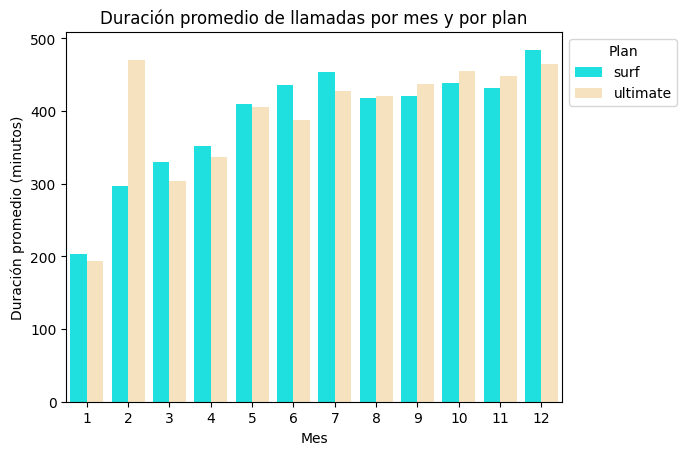

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

avg_duration = users_total.groupby(['plan_name', 'month'])['total_duration'].mean().reset_index()

sns.barplot(data= avg_duration, x='month', y='total_duration', hue='plan_name', palette=['cyan', 'moccasin'])

plt.title('Duración promedio de llamadas por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (minutos)')
plt.legend(title='Plan', bbox_to_anchor=(1, 1))

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes
</div>


In [32]:
print(users_total['plan_name'].isnull().sum())
print(users_total['plan_name'].unique())

0
['ultimate' 'surf']


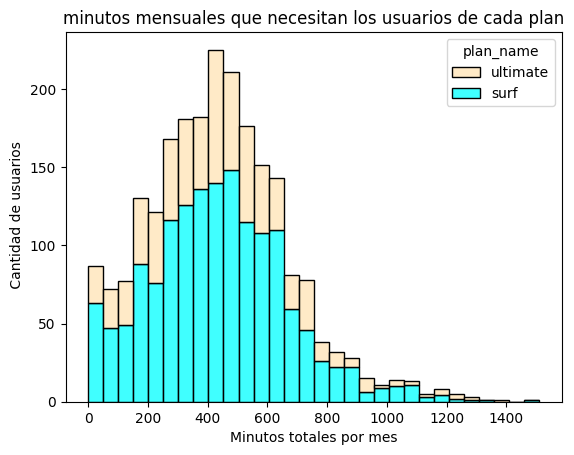

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.


sns.histplot(data = users_total, x='total_duration', hue='plan_name', 
             bins=30,
             multiple='stack',
             palette=['moccasin','cyan'],
            )

plt.title('minutos mensuales que necesitan los usuarios de cada plan')
plt.xlabel('Minutos totales por mes')
plt.ylabel(' Cantidad de usuarios')
plt.show()


In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
stats_by_plan = users_total.groupby(['plan_name','month'])['total_duration'].agg(['mean', 'var']).reset_index()
stats_by_plan.head()

,plan_name,month,mean,var
0,surf,1,203.00,15842.000000
1,surf,2,297.00,52226.500000
2,surf,3,330.00,35809.363636
3,surf,4,351.54,50866.743265
4,surf,5,410.24,56938.779459


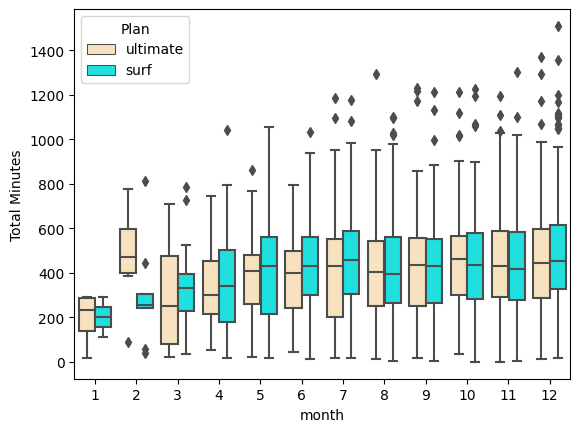

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=users_total, x='month', y='total_duration', hue='plan_name',
            palette=['moccasin', 'cyan'])

plt.legend(title='Plan')
plt.ylabel('Total Minutes')
plt.show()

Al ver los datos y la grafica comparativa de los dos planes en lo referente a los minutos totales en llamadas, podemos concluir que el comportamiento de los usuarios no varia ni en cuanto al paso del tiempo, en este caso los meses, ni en función del plan contratado, ya que la media y los datos se encuentra aproximadamente en el mismo rango.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los diagramas de caja nos permiten ver la distribución de ambos conjuntos de datos de una manera clara

</div>


### Mensajes

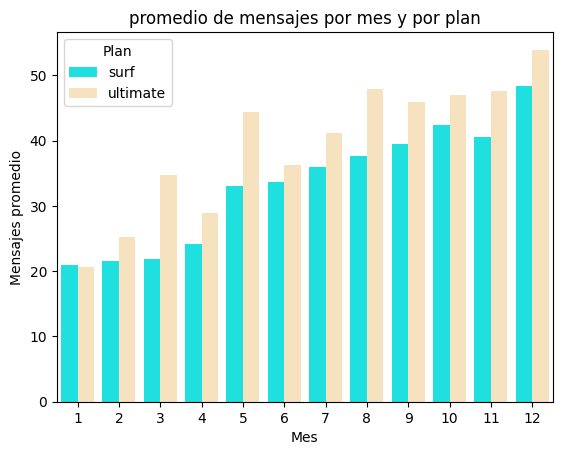

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_messages = users_total.groupby(['plan_name', 'month'])['total_messages'].mean().reset_index()

sns.barplot(data= avg_messages, x='month', y='total_messages', hue='plan_name', palette=['cyan', 'moccasin'])

plt.title('promedio de mensajes por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Mensajes promedio')
plt.legend(title='Plan', loc='upper left')

plt.show()

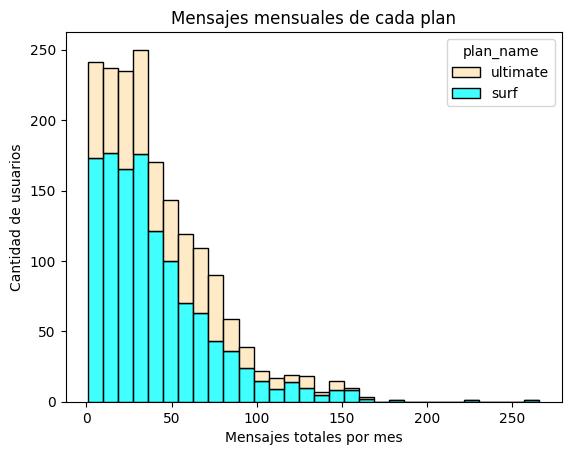

In [37]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.


sns.histplot(data = users_total, x='total_messages', hue='plan_name', 
             bins=30,
             multiple='stack',
             palette=['moccasin','cyan'],
            )

plt.title('Mensajes mensuales de cada plan')
plt.xlabel('Mensajes totales por mes')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [38]:
# Calcula la media y la varianza de los mensajes mensuales.
stats_by_message = users_total.groupby(['plan_name','month'])['total_messages'].agg(['mean', 'var']).reset_index()
stats_by_message.head()

,plan_name,month,mean,var
0,surf,1,21.000000,NaN
1,surf,2,21.600000,512.800000
2,surf,3,21.937500,352.062500
3,surf,4,24.166667,534.028571
4,surf,5,33.017857,867.945130


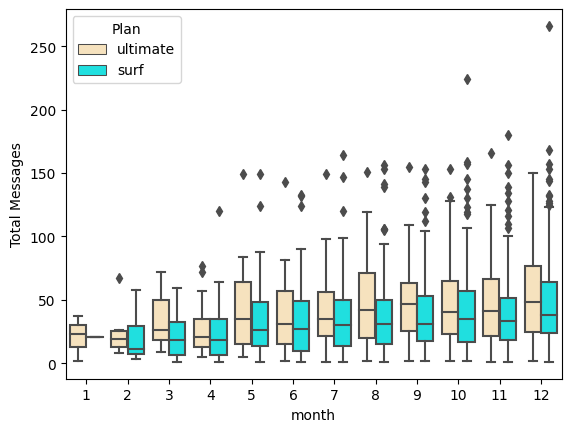

In [39]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes mensuales
sns.boxplot(data=users_total, x='month', y='total_messages', hue='plan_name',
            palette=['moccasin', 'cyan'])

plt.legend(title='Plan')
plt.ylabel('Total Messages')
plt.show()


Podemos concluir con base a los datos y sus estadísticas, que los usuarios del plan ultimate consumen en promedio más mensajes de texto que los del plan surf. Adicionalmente, vemos que la media esta al rededor de los 20 mensajes de texto por mes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buenas observaciones, buena manera de pensar en como se pueden aplicar estos conocimientos a casos útiles y reales
</div>


### Internet

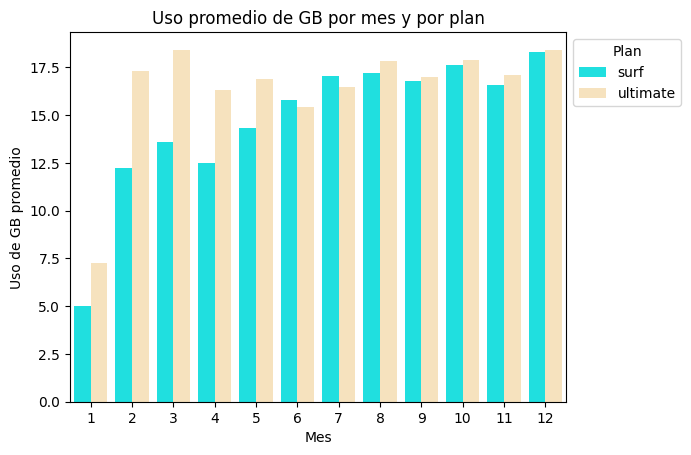

In [40]:
# Comprara la cnatidad de gb que tienden a usar cada mes los usuarios de cada plan
avg_internet = users_total.groupby(['plan_name', 'month'])['gb_used_month'].mean().reset_index()

sns.barplot(data= avg_internet, x='month', y='gb_used_month', hue='plan_name', palette=['cyan', 'moccasin'])

plt.title('Uso promedio de GB por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Uso de GB promedio')
plt.legend(title='Plan', bbox_to_anchor=(1,1))

plt.show()

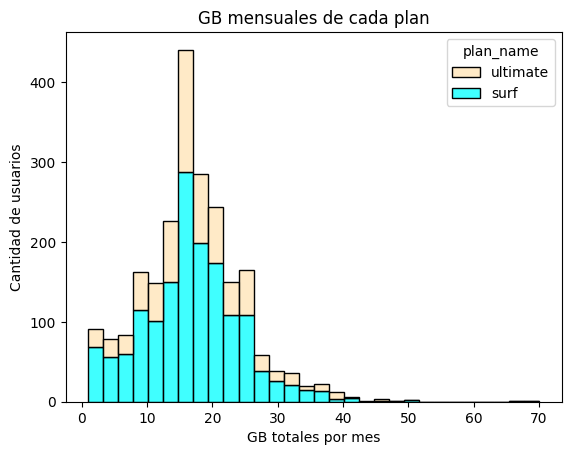

In [41]:
# Compara el número de GB mensuales que necesitan los usuarios de cada plan. Traza un histograma.


sns.histplot(data = users_total, x='gb_used_month', hue='plan_name', 
             bins=30,
             multiple='stack',
             palette=['moccasin','cyan'],
            )

plt.title('GB mensuales de cada plan')
plt.xlabel('GB totales por mes')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [42]:
# Calcula la media y la varianza de las GB mensuales.
stats_by_internet = users_total.groupby(['plan_name','month'])['gb_used_month'].agg(['mean', 'var']).reset_index()
stats_by_internet.head()

,plan_name,month,mean,var
0,surf,1,5.000000,18.000000
1,surf,2,12.222222,41.444444
2,surf,3,13.565217,63.984190
3,surf,4,12.469388,54.212585
4,surf,5,14.302632,56.267193


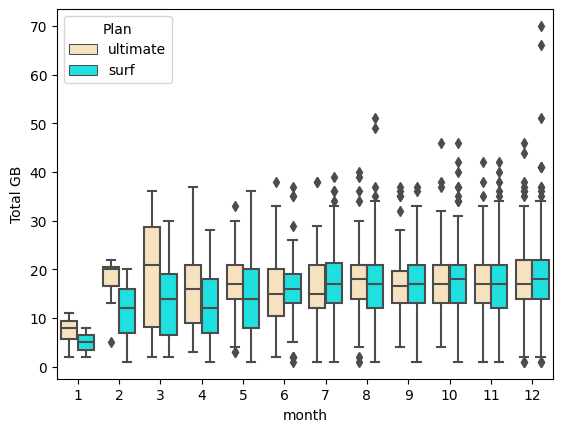

In [43]:
# Traza un diagrama de caja para visualizar la distribución de las GB mensuales
sns.boxplot(data=users_total, x='month', y='gb_used_month', hue='plan_name',
            palette=['moccasin', 'cyan'])

plt.legend(title='Plan')
plt.ylabel('Total GB')
plt.show()

Aca podemos observar que a pesar de las diferencias en cuanto al cobro de las GB no incluidas al mes, el comportamiento de los usuarios es similar para ambos planes, tendiendo los usuarios de Ultimate a usar un poco más de GB.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Gracias a estos analisis podemos crear nuevas estrategias para optimizar los planes y dar un mayor beneficio a cambio de mejores ingresos
</div>


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

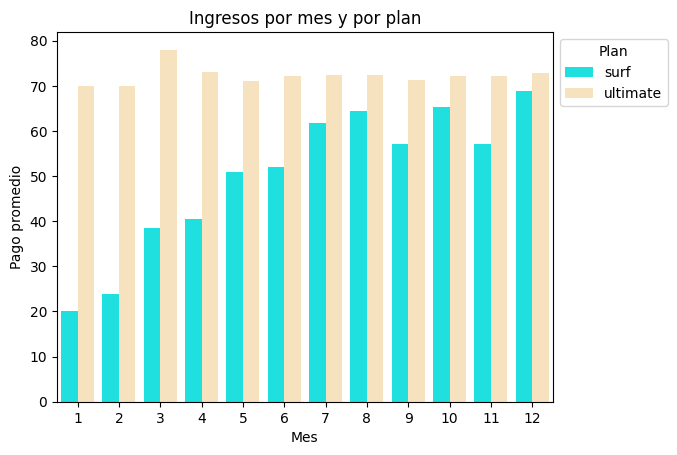

In [44]:
# Comprara la cantidad de ingresos por mes por usuarios de cada plan
avg_charge = users_total.groupby(['plan_name', 'month'])['total_price'].mean().reset_index()

sns.barplot(data= avg_charge, x='month', y='total_price', hue='plan_name', palette=['cyan', 'moccasin'])

plt.title('Ingresos por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Pago promedio')
plt.legend(title='Plan', bbox_to_anchor=(1,1))

plt.show()

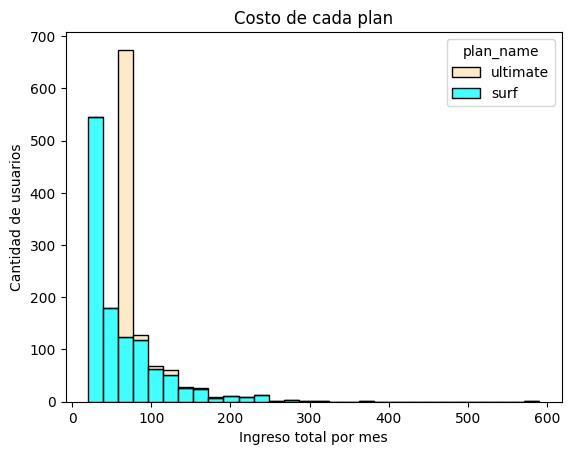

In [45]:
# Compara el ingreso por los usuarios de cada plan. Traza un histograma.


sns.histplot(data = users_total, x='total_price', hue='plan_name', 
             bins=30,
             multiple='stack',
             palette=['moccasin','cyan'],
            )

plt.title('Costo de cada plan')
plt.xlabel('Ingreso total por mes')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [46]:
# Calcula la media y la varianza de los ingresos mensuales.
stats_by_charge = users_total.groupby(['plan_name','month'])['total_price'].agg(['mean', 'var']).reset_index()
stats_by_charge.head()

,plan_name,month,mean,var
0,surf,1,20.000000,NaN
1,surf,2,23.914000,28.746980
2,surf,3,38.540625,549.488006
3,surf,4,40.591429,1250.948289
4,surf,5,50.857170,2308.394898


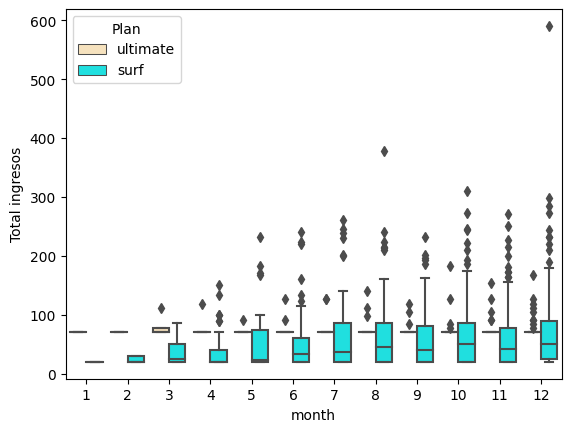

In [47]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos mensuales
sns.boxplot(data=users_total, x='month', y='total_price', hue='plan_name',
            palette=['moccasin', 'cyan'])

plt.legend(title='Plan')
plt.ylabel('Total ingresos')
plt.show()

Podemos concluir que los usuarios que dentro del plan ultimate, generalmente no tienen que pagar algo adicional a su tarifa pactada, mientras que los del plan surf, tienen que pagar en su mayoria más de los 20 USD pactados para su tarifa, pero sin embargo, no pagan más que los 70USD que cuesta el plan ultimate.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta es una grafica donde podemos ver diferencias más claras entre los planes, lo que nos ayuda a tomar mejores decisiones
</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

**Hipotesis 1:** 
El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
- Nula: Son iguales 
-Alternativa: Difieren

In [48]:
# Prueba las hipótesis

surf_info = users_total[users_total['plan_name']=='surf']['total_price'].dropna()
ultimate_info = users_total[users_total['plan_name']=='ultimate']['total_price'].dropna()

alpha= 0.05
results=st.ttest_ind(surf_info, ultimate_info, equal_var= True)
print('pvalue:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

pvalue: 1.6396969942407258e-07
Rechazamos la hipótesis nula


**Hipotesis 2:** el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
- Nula: Son iguales
-Alternativa: Difieren

In [49]:
# Prueba las hipótesis
NY_NJ_info= users_total[users_total['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_price'].dropna()
city_info=users_total[users_total['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_price'].dropna()

alpha= 0.05
results=st.ttest_ind(NY_NJ_info, city_info, equal_var= True)
print('pvalue:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

pvalue: 0.010353440224856581
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

El objetivo principal de este proyecto fue saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Al analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos, nos damos cuenta que los clientes del plan surf suelen pasarse de los límites incluidos en su plan, sin embargo a detalle por servicio podemos ver que: 
- El promedio de minutos en llamadas realizadas por cada usuario, son aproximadamente iguales para ambos planes, sin embargo, la mayoria de usuarios del plan surf sobrepasan los 500 minutos al mes, lo cual les genera un costo adicional.
- En cuanto a los mensajes en promedio se mandan 50 mensajes que son los incluidos en la tarifa surfer, pero nadie envia mas de 1000 mensajes de texto que son los incluidos en el plan ultimate, lo cual nos confirma que ninguno de los usuarios del plan ultimate va a pagar adicional por este servicio y de los usuarios del plan surf, la mayoria se mantienen alrededor de los 50 mensajes al mes, pero muchos de ellos pagan adicional.
- Con el servicio de internet vemos un comportamiento similar a los mensajes. Los usuarios del plan surf sobrepasan su limite de 15GB al mes y frecuentemente pagan adicional, mientras que muy pocos usuarios del plan ulitmate sobrepasan sus 30 GB. 

Ya adentrando al tema de que plan genera un mayor ingreso, concluimos que:
Constatando con la prueba de hipotesis, la cual rechazamos, sabemos que los ingresos por cada plan difieren.
A pesar de ser el plan surf más económico, es el que más difiere en cuanto a su costo, mientras que la mayoría de los usuarios del plan ultimate cancelan su tarifa sin adicionales. No obstante, el plan surf incluso con sus adicionales, no alcanza a generar los mismos ingresos que el plan ultimate, siendo este el que más ingresos genera a la compañia.

Por esta razón, sería recomendable ajustar el presupuesto de publicidad favoreciendo el plan ultimate. 

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>
